In [1191]:
import pandas as pd

In [1192]:
matches = pd.read_csv("./dim_match_summary.csv")
matches.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [1193]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      206 non-null    object
 1   team2      206 non-null    object
 2   winner     206 non-null    object
 3   margin     206 non-null    object
 4   matchDate  206 non-null    object
 5   match_id   206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


In [1194]:
matches.describe()

,team1,team2,winner,margin,matchDate,match_id
count,206,206,206,206,206,206
unique,10,10,10,62,166,206
top,Super Kings,KKR,Super Kings,6 wickets,"Oct 8, 2021",T203817
freq,29,27,25,25,2,1


In [1195]:
matches.isnull().sum()

team1        0
team2        0
winner       0
margin       0
matchDate    0
match_id     0
dtype: int64

In [1196]:
matches.tail()

,team1,team2,winner,margin,matchDate,match_id
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485
202,Royals,Sunrisers,Royals,72 runs,"Apr 2, 2023",T209117
203,Super Giants,Capitals,Super Giants,50 runs,"Apr 1, 2023",T208512
204,Punjab Kings,KKR,Punjab Kings,7 runs,"Apr 1, 2023",T202853
205,Super Kings,Titans,Titans,5 wickets,"Mar 31, 2023",T201566


In [1197]:
matches.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
201    False
202    False
203    False
204    False
205    False
Length: 206, dtype: bool

In [1198]:
matches.drop_duplicates(inplace=True)

In [1199]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      206 non-null    object
 1   team2      206 non-null    object
 2   winner     206 non-null    object
 3   margin     206 non-null    object
 4   matchDate  206 non-null    object
 5   match_id   206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB


In [1200]:
# Most successfull team 
top_teams = matches['winner'].value_counts().head()
top_teams

winner
Super Kings    25
RCB            25
Titans         23
Royals         22
KKR            21
Name: count, dtype: int64

In [1201]:
close_matches = matches[(matches['margin'].str.contains("runs")) & (matches['margin'].str.extract('(\d+)').astype(int) < 10).any(axis=1)]
close_matches

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\16052\AppData\Local\Temp\ipykernel_22444\583068645.py:1: SyntaxWarning: invalid escape sequence '\d'
  close_matches = matches[(matches['margin'].str.contains("runs")) & (matches['margin'].str.extract('(\d+)').astype(int) < 10).any(axis=1)]


,team1,team2,winner,margin,matchDate,match_id
8,Sunrisers,RCB,Sunrisers,4 runs,"Oct 6, 2021",T209992
12,RCB,Punjab Kings,RCB,6 runs,"Oct 3, 2021",T207754
23,Punjab Kings,Sunrisers,Punjab Kings,5 runs,"Sep 25, 2021",T203188
28,Royals,Punjab Kings,Royals,2 runs,"Sep 21, 2021",T207857
53,RCB,Sunrisers,RCB,6 runs,"Apr 14, 2021",T202204
55,Punjab Kings,Royals,Punjab Kings,4 runs,"Apr 12, 2021",T207896
67,Super Giants,KKR,Super Giants,2 runs,"May 18, 2022",T202863
68,Sunrisers,Mumbai,Sunrisers,3 runs,"May 17, 2022",T206060
82,Mumbai,Titans,Mumbai,5 runs,"May 6, 2022",T201720
88,Super Giants,Capitals,Super Giants,6 runs,"May 1, 2022",T208561


In [1202]:
batting = pd.read_csv("./fact_bating_summary.csv")
players = pd.read_csv("./dim_players.csv")

In [1203]:
batting.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [1204]:
players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [1205]:
top_scorers = (batting.groupby('batsmanName')["runs"].sum()
                .reset_index()
                .sort_values(by='runs', ascending=False))

top_scorers

,batsmanName,runs
222,ShubmanGill,1851
66,FafduPlessis,1831
197,RuturajGaikwad,1593
97,KLRahul,1516
95,JosButtler,1509
...,...,...
210,ShahbazNadeem,0
203,SanjayYadav,0
233,TNatarajan,0
259,YashDayal,0


In [1206]:
merged = top_scorers.merge(players, left_on='batsmanName', right_on='name')

In [1207]:
bowling = pd.read_csv("./fact_bowling_summary.csv")
bowling

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.00,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.00,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.00,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.50,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.50,6,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,T201566,Super Kings Vs Titans,Super Kings,DeepakChahar,4.0,0,29,0,7.25,9,1,2,0,0
2432,T201566,Super Kings Vs Titans,Super Kings,TusharDeshpande,3.2,0,51,1,15.30,5,4,4,1,1
2433,T201566,Super Kings Vs Titans,Super Kings,RajvardhanHangargekar,4.0,0,36,3,9.00,10,4,1,3,1
2434,T201566,Super Kings Vs Titans,Super Kings,MitchellSantner,4.0,0,32,0,8.00,7,5,0,0,0


In [1208]:
top_wickets = (bowling.groupby('bowlerName')["wickets"].sum()
                .reset_index()
                .sort_values(by='wickets'))

top_wickets

,bowlerName,wickets
11,AmanHakimKhan,0
24,BenStokes,0
62,JalajSaxena,0
56,HimanshuSharma,0
51,HarbhajanSingh,0
...,...,...
20,AveshKhan,47
141,RashidKhan,63
54,HarshalPatel,65
201,YuzvendraChahal,66


In [1209]:
economy = (bowling.groupby('bowlerName')
            .agg({'overs': "sum", 'runs': 'sum'})
            .query('overs > 50')
            .assign(economy=lambda x: x['runs'] / x['overs'])
            .sort_values(by='economy')
            .reset_index()
            .head(10)
            )

economy

,bowlerName,overs,runs,economy
0,SunilNarine,160.0,1056,6.600000
1,MoeenAli,70.7,501,7.086280
2,AxarPatel,132.0,939,7.113636
3,RashidKhan,182.5,1317,7.216438
4,JaspritBumrah,108.2,793,7.329020
5,KrunalPandya,113.1,843,7.453581
6,RavindraJadeja,136.0,1014,7.455882
7,RavichandranAshwin,156.0,1175,7.532051
8,VarunChakravarthy,159.4,1209,7.584693
9,HarpreetBrar,66.1,503,7.609682


In [1210]:
top_winners =(matches['winner'].value_counts().head(10))
top_winners

winner
Super Kings     25
RCB             25
Titans          23
Royals          22
KKR             21
Capitals        21
Mumbai          20
Punjab Kings    19
Super Giants    17
Sunrisers       13
Name: count, dtype: int64

In [1211]:
top_scorers.to_csv("ipl_top_scorers.csv", index=False)
top_winners.to_csv("ipl_top_winners.csv", index=False)

Assaignment

In [1212]:
#Assaignment :
batting=pd.read_csv("./fact_bating_summary.csv")
top_scorers=pd.read_csv("./ipl_top_scorers.csv")

In [1213]:
#1 .Top 10 batsmen based on past 3 years total runs scored. 
top_scorers = (
    batting.groupby("batsmanName")["runs"].sum()
    .reset_index()
    .sort_values(by="runs",ascending=False)   
)
top_scorers.head(10)                                  

,batsmanName,runs
222,ShubmanGill,1851
66,FafduPlessis,1831
197,RuturajGaikwad,1593
97,KLRahul,1516
95,JosButtler,1509
216,ShikharDhawan,1392
251,ViratKohli,1385
204,SanjuSamson,1304
230,SuryakumarYadav,1225
69,GlennMaxwell,1214


In [1214]:
%matplotlib inline
import matplotlib.pyplot as plt

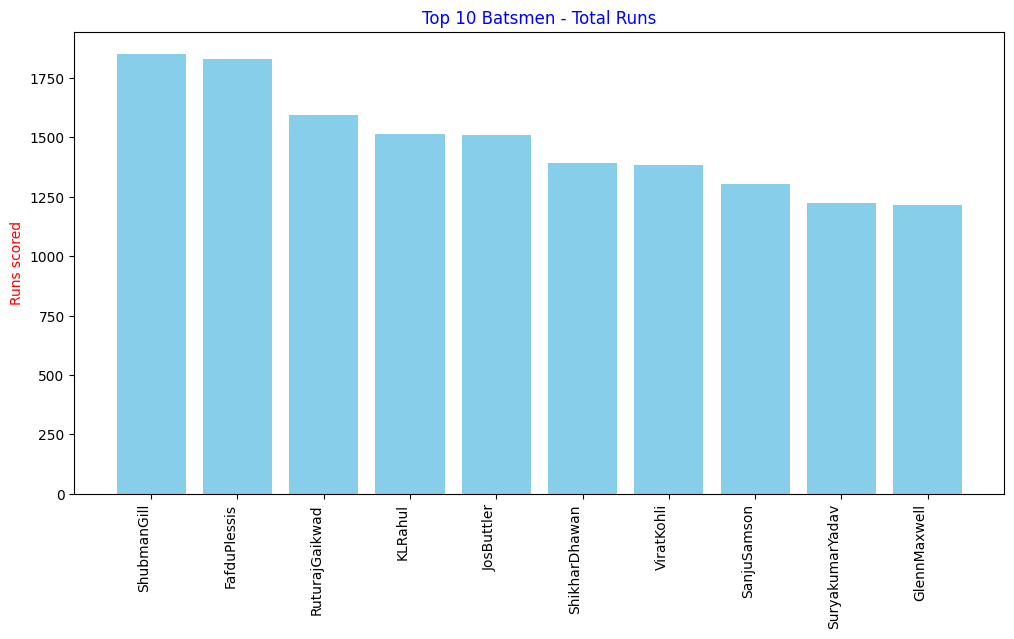

In [1215]:
top10 = top_scorers.head(10) 
plt.figure(figsize=(12,6)) 
plt.bar(top10["batsmanName"], top10["runs"], color="skyblue")
plt.xticks(rotation=90, ha ='right')
plt.ylabel("Runs scored", fontdict={'color': 'red'})
plt.title("Top 10 Batsmen - Total Runs", fontdict={"color": "blue"})
plt.show()

In [1216]:
#2 . Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)  
bat_agg = (batting.groupby("batsmanName")
                   .agg(runs=("runs","sum"),
                       balls=("balls","sum"),
                   ))
finishers = (bat_agg.query("balls >= 180")
                    .assign(batting_average=lambda x: x["runs"] / x["balls"].replace(0, pd.NA))
                    .sort_values("batting_average", ascending=False)
                    .head(10))
finishers[["runs","balls","batting_average"]]

,runs,balls,batting_average
batsmanName,,,
TimDavid,418,235,1.778723
HeinrichKlaasen,448,253,1.770751
LiamLivingstone,758,452,1.676991
GlennMaxwell,1214,752,1.614362
SuryakumarYadav,1225,763,1.605505
CameronGreen,452,282,1.602837
JiteshSharma,543,341,1.592375
AndreRussell,745,468,1.591880
ShimronHetmyer,854,543,1.572744


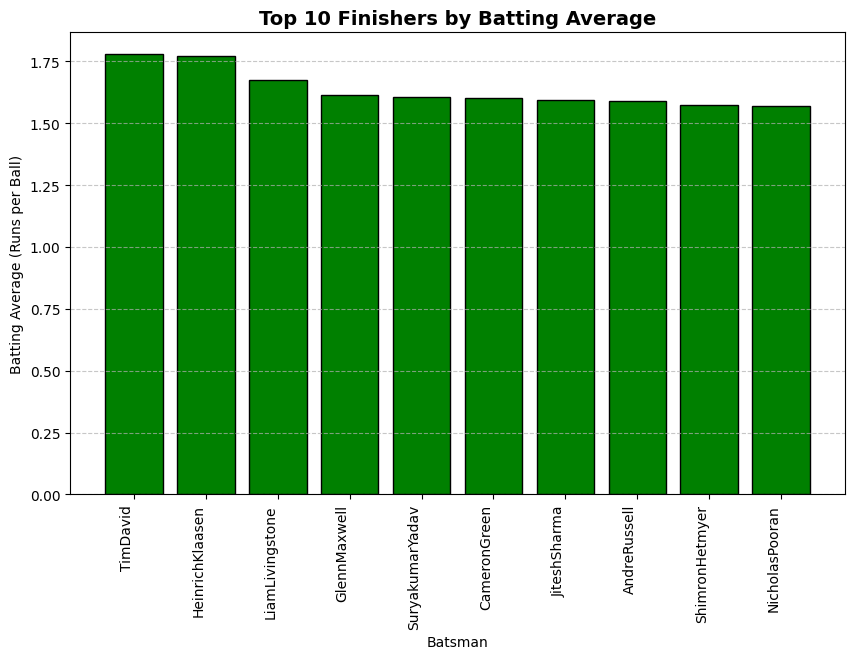

In [1217]:
bat_agg=finishers[["runs","balls","batting_average"]]
plt.figure(figsize=(10, 6))
plt.bar(finishers.index, finishers["batting_average"], color="green", edgecolor='black')
plt.xlabel("Batsman", fontsize=10)
plt.ylabel("Batting Average (Runs per Ball)", fontsize=10)
plt.title("Top 10 Finishers by Batting Average", fontsize=14, fontweight="bold")
plt.xticks(rotation=90, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1218]:
#3 .  Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)  
bat_agg = (batting.groupby("batsmanName")
                   .agg(runs=("runs","sum"),
                       balls=("balls","sum"),
                   ))
finishers = (bat_agg.query("balls >= 180")
                    .assign(strike_rate=lambda x:100* x["runs"] / x["balls"])
                    .sort_values("strike_rate", ascending=False)
                    .head(15))
print(finishers[["runs","balls","strike_rate"]])

                 runs  balls  strike_rate
batsmanName                              
TimDavid          418    235   177.872340
HeinrichKlaasen   448    253   177.075099
LiamLivingstone   758    452   167.699115
GlennMaxwell     1214    752   161.436170
SuryakumarYadav  1225    763   160.550459
CameronGreen      452    282   160.283688
JiteshSharma      543    341   159.237537
AndreRussell      745    468   159.188034
ShimronHetmyer    854    543   157.274401
NicholasPooran    729    464   157.112069
PrithviShaw       815    532   153.195489
DineshKarthik     693    454   152.643172
YashasviJaiswal  1132    744   152.150538
RinkuSingh        648    434   149.308756
KyleMayers        365    246   148.373984


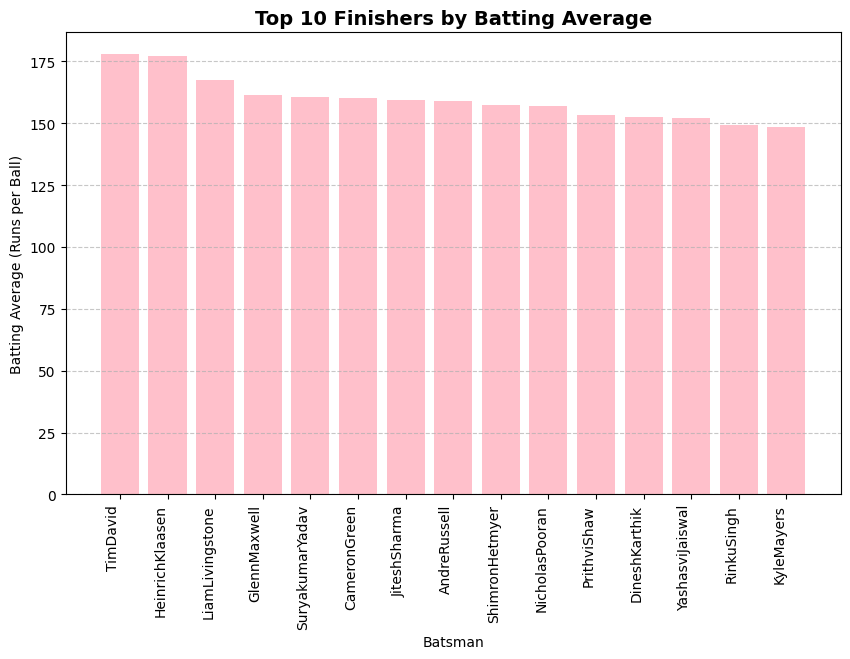

In [1219]:
bat_agg=finishers[["runs","balls","strike_rate"]]
plt.figure(figsize=(10, 6))
plt.bar(finishers.index,finishers["strike_rate"], color="Pink")
plt.xlabel("Batsman", fontsize=10)
plt.ylabel("Batting Average (Runs per Ball)", fontsize=10)
plt.title("Top 10 Finishers by Batting Average", fontsize=14, fontweight="bold")
plt.xticks(rotation=90, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1220]:
#4 .Top 10 bowlers based on past 3 years total wickets taken. 
top_bowlers = (
    bowling.groupby("bowlerName")["wickets"].sum()
    .reset_index()
    .sort_values(by="wickets", ascending=False)
)
top_10_bowlers = top_bowlers.head(10)
top_10_bowlers

,bowlerName,wickets
110,MohammedShami,67
201,YuzvendraChahal,66
54,HarshalPatel,65
141,RashidKhan,63
20,AveshKhan,47
19,ArshdeepSingh,45
75,KagisoRabada,45
189,VarunChakravarthy,44
163,ShardulThakur,43
181,TrentBoult,42


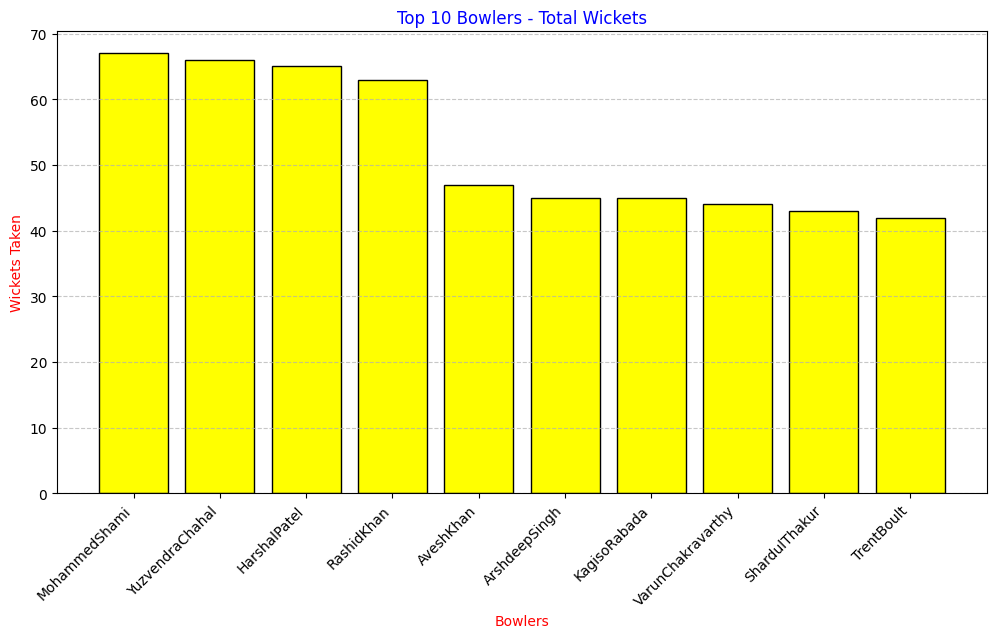

In [1221]:
top_10=top_10_bowlers 
plt.figure(figsize=(12,6)) 
plt.bar(top_10["bowlerName"], top_10["wickets"], color="yellow", edgecolor="black")
plt.xlabel("Bowlers",fontdict={'color':'red'})
plt.xticks(rotation=45, ha ='right')
plt.ylabel("Wickets Taken", fontdict={'color': 'red'})
plt.title("Top 10 Bowlers - Total Wickets", fontdict={"color": "blue"})
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1222]:
#5 . Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season) 
bowl_agg = bowling.groupby("bowlerName").agg(
    runs_conceded=("runs", "sum"),
    overs=("overs","sum"),
    wickets=("wickets", "sum"))

bowlers_filtered = (
    bowl_agg.query("overs >= 10")
            .assign(bowling_average=lambda x: x["runs_conceded"] / x["wickets"].replace(0, pd.NA))
            .sort_values("bowling_average", ascending=True)
            .head(10)
)
print(bowlers_filtered[["runs_conceded", "overs", "wickets", "bowling_average"]])

                  runs_conceded  overs  wickets  bowling_average
bowlerName                                                      
MoisesHenriques              45   10.0        4        11.250000
MarkWood                    130   16.0       11        11.818182
MohitSharma                 361   43.7       27        13.370370
AkashMadhwal                219   25.3       14        15.642857
MichaelBracewell             95   11.0        6        15.833333
ChrisWoakes                  82   11.0        5        16.400000
MitchellMarsh               272   32.1       16        17.000000
MohsinKhan                  304   43.0       17        17.882353
AndreRussell                638   61.8       35        18.228571
DwayneBravo                 562   67.2       30        18.733333


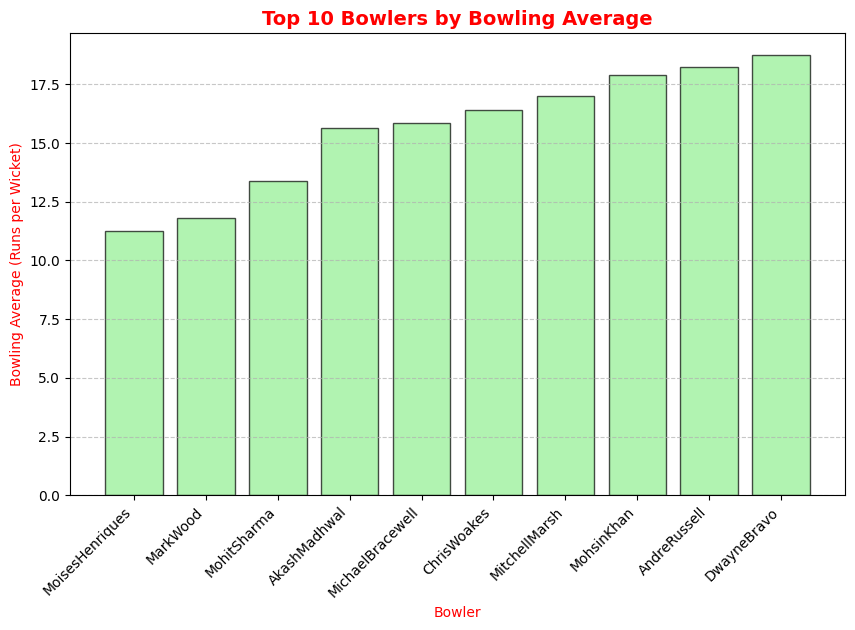

In [1223]:
bowlers=bowlers_filtered[["runs_conceded", "overs", "wickets", "bowling_average"]]
plt.figure(figsize=(10, 6))
plt.bar(bowlers_filtered.index, bowlers_filtered["bowling_average"], color="lightgreen", alpha=0.7,edgecolor="black")
plt.xlabel("Bowler", fontsize=10,fontdict={'color':'red'})
plt.ylabel("Bowling Average (Runs per Wicket)", fontsize=10,fontdict={'color':'red'})
plt.title("Top 10 Bowlers by Bowling Average", fontsize=14, fontweight="bold",color='red')
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1224]:
#6 . Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)
bowl_agg = bowling.groupby("bowlerName").agg(
    runs_conceded=("runs", "sum"),
    wickets=("wickets", "sum")
)
bowl_agg["bowling_average"] = bowl_agg["runs_conceded"] / bowl_agg["wickets"].replace(0, pd.NA)
bowl_agg

,runs_conceded,wickets,bowling_average
bowlerName,,,
AbdulSamad,17,1,17.0
AbhishekSharma,212,6,35.333333
AdamMilne,150,3,50.0
AdamZampa,188,8,23.5
AdilRashid,91,2,45.5
...,...,...,...
YashDayal,461,13,35.461538
YashThakur,289,13,22.230769
YashasviJaiswal,6,0,<NA>


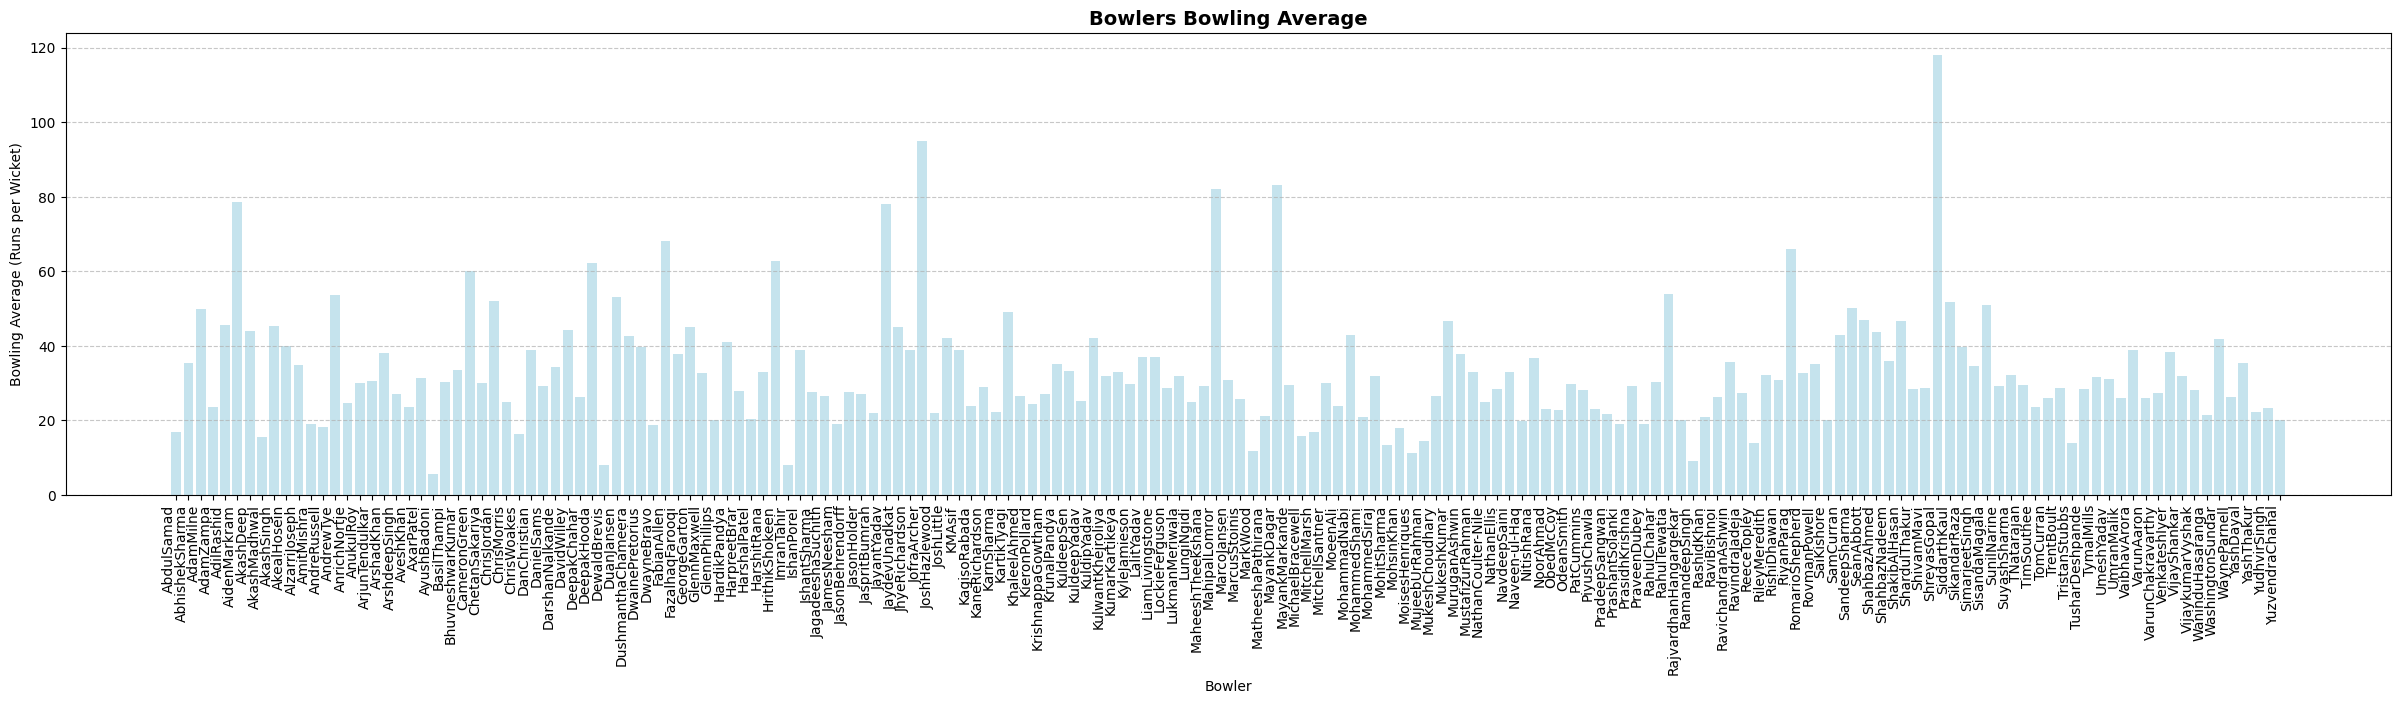

In [1225]:
bowl_agg_plot = bowl_agg.dropna(subset=["bowling_average"])
plt.figure(figsize=(30, 6))
plt.bar(bowl_agg_plot.index.tolist(), bowl_agg_plot["bowling_average"], color="lightblue", alpha=0.7)
plt.xlabel("Bowler", fontsize=10)
plt.ylabel("Bowling Average (Runs per Wicket)", fontsize=10)
plt.title("Bowlers Bowling Average", fontsize=14, fontweight="bold")
plt.xticks(rotation=90, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [1226]:
#7 . Top 5 batsmen based on past 3 years boundary % (fours and sixes). 
# Step 1: Aggregate runs, fours, sixes
boundary = (
    batting.groupby("batsmanName")[["runs", "4s", "6s"]].sum()
           .assign(boundary_percent=lambda x: (x["4s"] + x["6s"]) / x["runs"] * 100)
           .query("runs >= 4")
           .sort_values("boundary_percent", ascending=False)
           .head(5)
)
print(boundary[["runs", "4s", "6s", "boundary_percent"]])

               runs  4s  6s  boundary_percent
batsmanName                                  
AbhijeetTomar     4   1   0         25.000000
LittonDas         4   1   0         25.000000
ShreyasGopal     16   2   1         18.750000
MarkWood         11   1   1         18.181818
SanvirSingh      11   1   1         18.181818


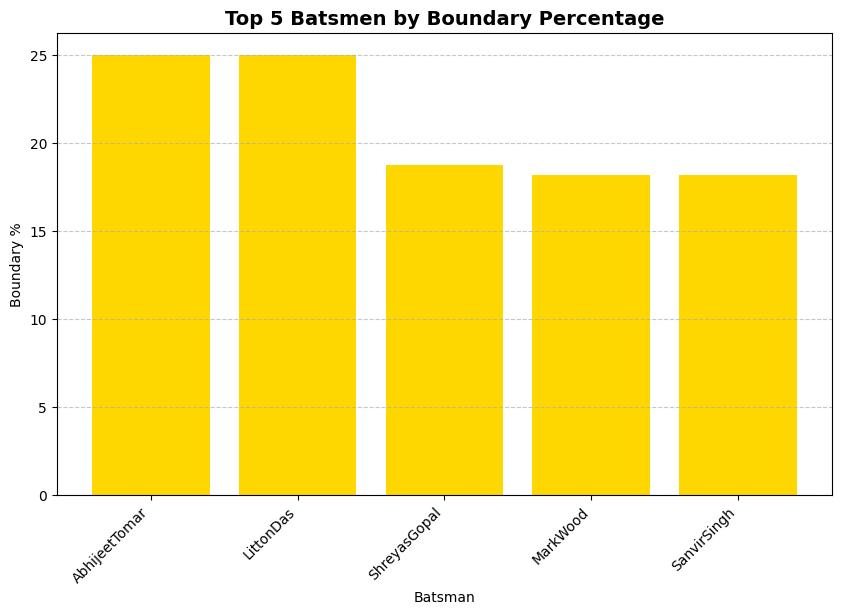

In [1227]:

plt.figure(figsize=(10, 6))
plt.bar(boundary.index.tolist(), boundary["boundary_percent"], color="gold", alpha=1.0)
plt.xlabel("Batsman", fontsize=10)
plt.ylabel("Boundary %", fontsize=10)
plt.title("Top 5 Batsmen by Boundary Percentage", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1228]:
print(bowling.columns.tolist())

['match_id', 'match', 'bowlingTeam', 'bowlerName', 'overs', 'maiden', 'runs', 'wickets', 'economy', '0s', '4s', '6s', 'wides', 'noBalls']


In [1229]:
#8 .Top 5 bowlers based on past 3 years dot ball %.  
bowling = bowling.copy()
bowling["balls"] = bowling["overs"] * 6
dot_ball_stats = (
    bowling.groupby("bowlerName")
           .agg(dot_balls=("0s", "sum"), balls=("balls", "sum"))
           .assign(dot_ball_percent=lambda x: 100 * x["dot_balls"] / x["balls"])
           .query("balls > 0")
           .sort_values("dot_ball_percent", ascending=False)
           .head(5)
)
print(dot_ball_stats[["dot_balls","balls","dot_ball_percent"]])

                dot_balls  balls  dot_ball_percent
bowlerName                                        
ShreyasIyer             4    6.0         66.666667
ImranTahir             14   24.0         58.333333
ReeceTopley             7   12.0         58.333333
DewaldBrevis            1    1.8         55.555556
SimarjeetSingh         57  108.0         52.777778


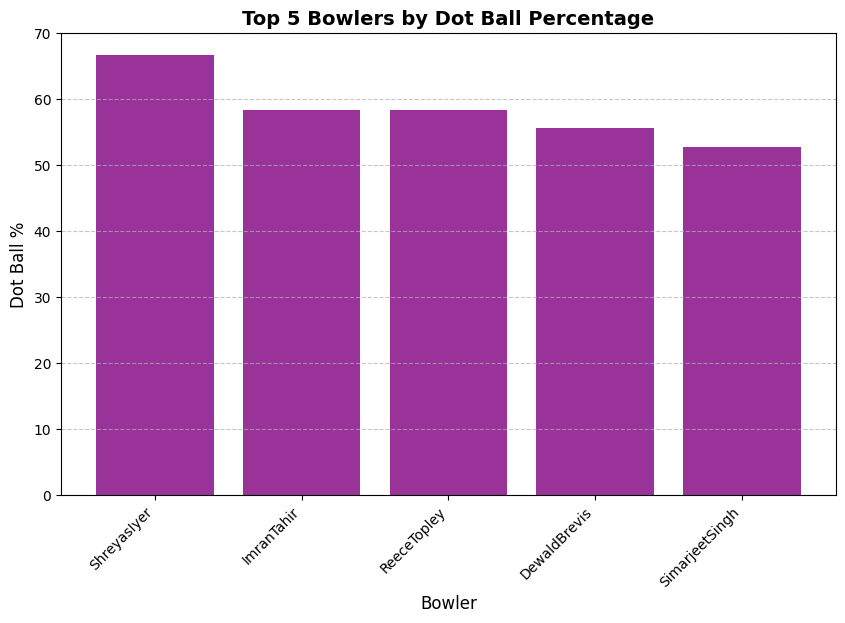

In [1230]:
plt.figure(figsize=(10, 6))
plt.bar(dot_ball_stats.index.tolist(), dot_ball_stats["dot_ball_percent"], color="purple", alpha=0.8)
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("Dot Ball %", fontsize=12)
plt.title("Top 5 Bowlers by Dot Ball Percentage", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1231]:
#9 . Top 4 teams based on past 3 years winning %.
team_stats = (
    matches.melt(id_vars=["match_id","winner"], value_vars=["team1","team2"], value_name="team")
           .groupby("team")["match_id"].nunique()
           .to_frame("matches_played")
           .join(matches.groupby("winner")["match_id"].nunique().to_frame("matches_won"))
           .fillna(0)
           .assign(win_percent=lambda x: x["matches_won"] / x["matches_played"] * 100)
           .sort_values("win_percent", ascending=False)
           .head(4)
)

print(team_stats[["matches_played","matches_won","win_percent"]])

              matches_played  matches_won  win_percent
team                                                  
Titans                    33           23    69.696970
Super Giants              29           17    58.620690
RCB                       45           25    55.555556
Super Kings               45           25    55.555556


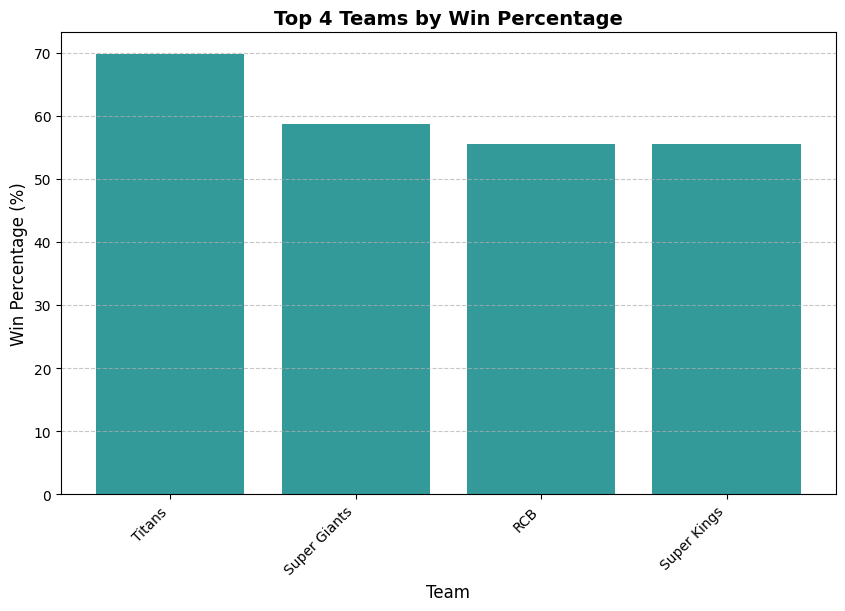

In [1232]:
plt.figure(figsize=(10, 6))
plt.bar(team_stats.index.tolist(), team_stats["win_percent"], color="teal", alpha=0.8)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Win Percentage (%)", fontsize=12)
plt.title("Top 4 Teams by Win Percentage", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1233]:
#10 .Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years. 
chasing_wins = (
    matches.query("winner == team2") 
           .groupby("winner")["match_id"].nunique()
           .rename("chasing_wins")
           .to_frame()
           .sort_values("chasing_wins", ascending=False)
           .head(2)
)
print(chasing_wins)

          chasing_wins
winner                
Capitals            14
KKR                 14


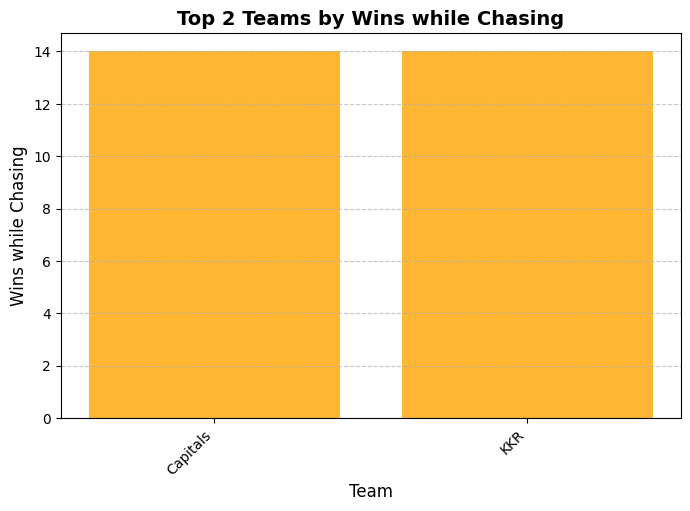

In [1234]:
plt.figure(figsize=(8, 5))
plt.bar(chasing_wins.index.tolist(), chasing_wins["chasing_wins"], color="orange", alpha=0.8)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Wins while Chasing", fontsize=12)
plt.title("Top 2 Teams by Wins while Chasing", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [1235]:
matches=pd.read_csv("./fact_bating_summary.csv")
matches=pd.read_csv("./fact_bowling_summary.csv")
matches=pd.read_csv("./dim_match_summary.csv")

In [1236]:
#1. Orange and purple cap player  
matches['matchDate'] = pd.to_datetime(matches['matchDate'], errors='coerce')
matches['year'] = matches['matchDate'].dt.year

batting = batting.merge(matches[['match_id','year']], on='match_id', how='left')
bowling = bowling.merge(matches[['match_id','year']], on='match_id', how='left')

batting_agg = (
    batting.groupby(['year','batsmanName'])['runs']
           .sum()
           .reset_index()
)

bowling_agg = (
    bowling.groupby(['year','bowlerName'])['wickets']
           .sum()
           .reset_index()
)

batting_pred = (
    batting_agg[batting_agg['year'].between(2021,2023)]
    .groupby('batsmanName')['runs']
    .mean()
    .reset_index()
    .rename(columns={'runs':'predicted_2024_runs'})
)

bowling_pred = (
    bowling_agg[bowling_agg['year'].between(2021,2023)]
    .groupby('bowlerName')['wickets']
    .mean()
    .reset_index()
    .rename(columns={'wickets':'predicted_2024_wickets'})
)

orange_cap_pred = batting_pred.sort_values('predicted_2024_runs', ascending=False).head(1)
print("Predicted Orange Cap 2024:")
print(orange_cap_pred[['batsmanName','predicted_2024_runs']])

purple_cap_pred = bowling_pred.sort_values('predicted_2024_wickets', ascending=False).head(1)
print("\nPredicted Purple Cap 2024:")
print(purple_cap_pred[['bowlerName','predicted_2024_wickets']])

Predicted Orange Cap 2024:
     batsmanName  predicted_2024_runs
66  FafduPlessis           610.333333

Predicted Purple Cap 2024:
      bowlerName  predicted_2024_wickets
113  MohitSharma                    24.0


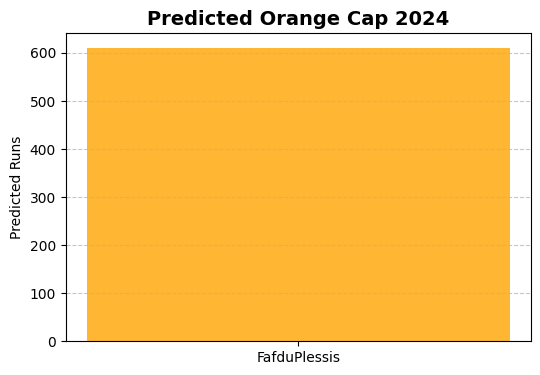

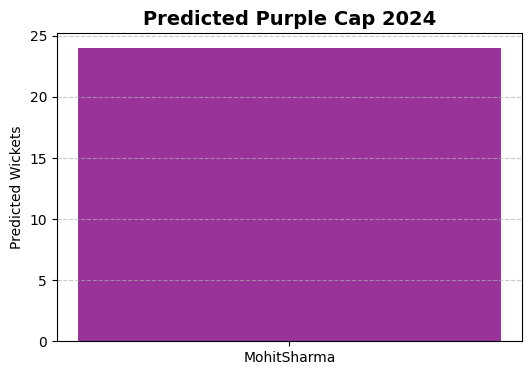

In [1237]:
plt.figure(figsize=(6,4))
plt.bar(orange_cap_pred['batsmanName'], orange_cap_pred['predicted_2024_runs'], color="orange", alpha=0.8)
plt.title("Predicted Orange Cap 2024", fontsize=14, fontweight="bold")
plt.ylabel("Predicted Runs", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(6,4))
plt.bar(purple_cap_pred['bowlerName'], purple_cap_pred['predicted_2024_wickets'], color="purple", alpha=0.8)
plt.title("Predicted Purple Cap 2024", fontsize=14, fontweight="bold")
plt.ylabel("Predicted Wickets", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
#2 .Top 4 qualifying teams 
matches['matchDate'] = pd.to_datetime(matches['matchDate'], errors='coerce')
matches['year'] = matches['matchDate'].dt.year

batting = batting.merge(matches[['match_id','year']], on='match_id', how='left')
bowling = bowling.merge(matches[['match_id','year']], on='match_id', how='left')

batting_agg = (
    batting.groupby(['year','batsmanName'])['runs'].sum().reset_index()
)


bowling_agg = (
    bowling.groupby(['year','bowlerName'])['wickets']
           .sum()
           .reset_index()
)

batting_pred = (
    batting_agg[batting_agg['year'].between(2021,2023)]
    .groupby('batsmanName')['runs']
    .mean()
    .reset_index()
    .rename(columns={'runs':'predicted_2024_runs'})
)

bowling_pred = (
    bowling_agg[bowling_agg['year'].between(2021,2023)]
    .groupby('bowlerName')['wickets']
    .mean()
    .reset_index()
    .rename(columns={'wickets':'predicted_2024_wickets'})
)

team_stats = (
    matches[matches['year'].between(2021, 2023)]
    .melt(id_vars=["match_id","winner","year"], value_vars=["team1","team2"], value_name="team")
    .groupby("team")["match_id"].nunique()
    .to_frame("matches_played")
    .join(matches[matches['year'].between(2021, 2023)]
          .groupby("winner")["match_id"].nunique()
          .to_frame("matches_won"))
    .fillna(0)
)

team_stats['win_percent'] = team_stats['matches_won'] / team_stats['matches_played'] * 100
top4_teams = team_stats.sort_values("win_percent", ascending=False).head(4)
print("\nPredicted Top 4 Qualifying Teams for 2024:")
print(top4_teams[['matches_played','matches_won','win_percent']])


Predicted Top 4 Qualifying Teams for 2024:
              matches_played  matches_won  win_percent
team                                                  
Titans                    32           23    71.875000
Super Giants              29           17    58.620690
RCB                       45           25    55.555556
Super Kings               44           24    54.545455


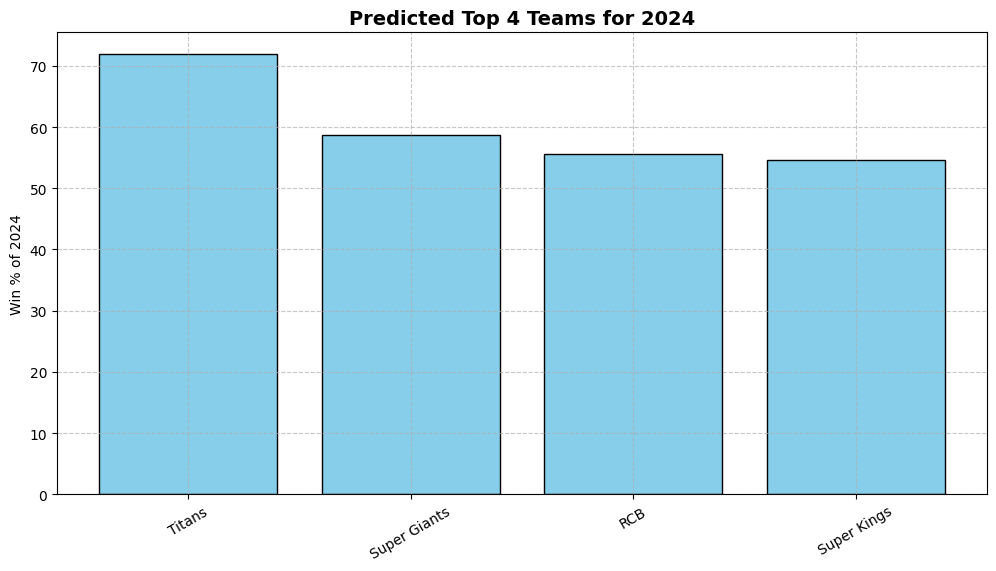

In [1249]:
plt.figure(figsize=(12,6))
plt.bar(top4_teams.index, top4_teams['win_percent'], color="skyblue", edgecolor="black")
plt.title("Predicted Top 4 Teams for 2024", fontsize=14, fontweight="bold")
plt.ylabel("Win % of 2024", fontsize=10)
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()